## Pymaceutical Inc Analysis Code Written by Thinh Nguyen
* The drugs Capomulin and Ramicane demonstrates the greatest reduction in tumor volumes out of all the tested drugs.
* The drug Propriva has the lowest mouse survival rates out of all the drugs.
* The drugs Capomulin and Ramicane also have the lowest number of metastatic sites occurring.

In [16]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)

In [17]:
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
MouseDF=pd.read_csv(mouse_drug_data_to_load);
ClinTriDF=pd.read_csv(clinical_trial_data_to_load);
MouseDF.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [18]:

# Combine the data into a single dataset
MergeDF=pd.merge(MouseDF,ClinTriDF); # Uses Merge to combine the two DF.
MergeDF.head()
# Display the data table for preview

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [19]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
GroupDrug_Tp=MergeDF.groupby(['Drug','Timepoint']); # Groups by Drug and Timepoint Columns
TumorMean=GroupDrug_Tp['Tumor Volume (mm3)'].mean(); # Finds the mean of the tumor Volume.


# Convert to DataFrame
DrugtpDF=pd.DataFrame(TumorMean);
# Preview DataFrame
DrugtpDF=DrugtpDF.reset_index() # Resets the index of the DF
DrugtpDF.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [20]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
SEGroup=GroupDrug_Tp['Tumor Volume (mm3)'].sem() # Creates Standard error group DF.
# Convert to DataFrame
seDF=pd.DataFrame(SEGroup);
# Preview DataFrame
seDF=seDF.reset_index()
seDF.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [21]:
# Minor Data Munging to Re-Format the Data Frames
Pivoted = pd.pivot_table(DrugtpDF,index='Timepoint',columns='Drug',values='Tumor Volume (mm3)') # Creates a Pivoted DF

# Preview that Reformatting worked
Pivoted.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


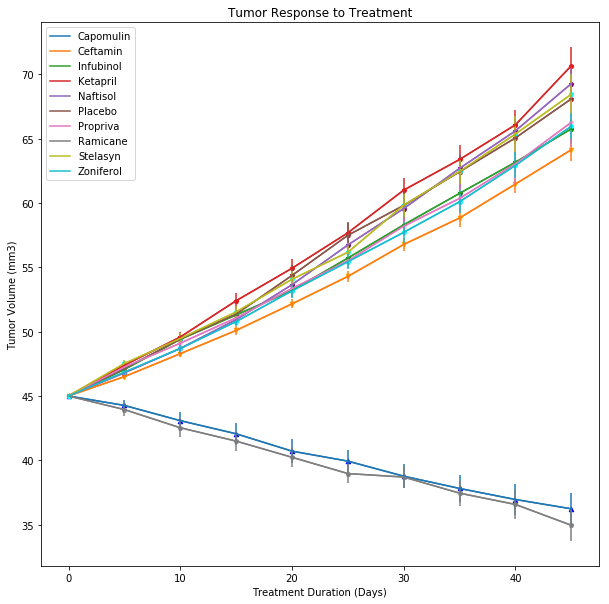

<Figure size 432x288 with 0 Axes>

In [22]:
# Generate the Plot (with Error Bars)
PlotSetup=Pivoted.reset_index() # Resets DF to have default indexes.

#Sets up each drug scatter plot and adds it to the graph.
ax=PlotSetup.plot(title='Tumor Response to Treatment', kind='scatter',x='Timepoint',y='Capomulin',c='blue',marker='^',figsize=(10,10))
PlotSetup.plot(kind='scatter',x='Timepoint',y='Ceftamin',c='orange',marker='v',ax=ax)
PlotSetup.plot(kind='scatter',x='Timepoint',y='Infubinol',c='green',marker='p',ax=ax)
PlotSetup.plot(kind='scatter',x='Timepoint',y='Ketapril',c='red',marker='p',ax=ax)
PlotSetup.plot(kind='scatter',x='Timepoint',y='Naftisol',c='purple',marker='p',ax=ax)
PlotSetup.plot(kind='scatter',x='Timepoint',y='Placebo',c='brown',marker='p',ax=ax)
PlotSetup.plot(kind='scatter',x='Timepoint',y='Propriva',c='pink',marker='p',ax=ax)
PlotSetup.plot(kind='scatter',x='Timepoint',y='Ramicane',c='gray',marker='p',ax=ax)
PlotSetup.plot(kind='scatter',x='Timepoint',y='Stelasyn',c='cyan',marker='p',ax=ax)
PlotSetup.plot(kind='scatter',x='Timepoint',y='Zoniferol',c='aqua',marker='p',ax=ax)



PlotSetup.plot(kind='line',x='Timepoint',ax=ax)
ax.set_ylabel('Tumor Volume (mm3)') # Sets the y Axis label.
ax.set_xlabel('Treatment Duration (Days)') 
ax.legend(loc='best') #Moves the legend to the best location.

Index=PlotSetup.columns[1:] # Establishes the list of drugs.


#Uses a for loop to loop through each drug and add the standard error bars.
for Drug in Index:
    DF=seDF.loc[seDF['Drug']==Drug,['Timepoint','Tumor Volume (mm3)']]
    ax.errorbar(x=DF['Timepoint'],y=PlotSetup[Drug],yerr=DF['Tumor Volume (mm3)'])

         
# Save the Figure in the same folder.

fig=ax.get_figure();
fig.savefig('TumorResponse.png')


plt.show()
plt.tight_layout()

## Metastatic Response to Treatment

In [23]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
MetResponseMean=GroupDrug_Tp['Metastatic Sites'].mean()

# Convert to DataFrame
MetDF=pd.DataFrame(MetResponseMean);
# Preview DataFrame
MetDF=MetDF.reset_index()
MetDF.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [24]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
MetSE=GroupDrug_Tp['Metastatic Sites'].sem() # Creates Standard error group DF.
# Convert to DataFrame
MetseDF=pd.DataFrame(MetSE);
# Preview DataFrame
MetseDF=MetseDF.reset_index()
MetseDF.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [25]:
# Minor Data Munging to Re-Format the Data Frames
PivotedMet = pd.pivot_table(MetDF,index='Timepoint',columns='Drug',values='Metastatic Sites') # Creates a Pivoted DF

# Preview that Reformatting worked
PivotedMet.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


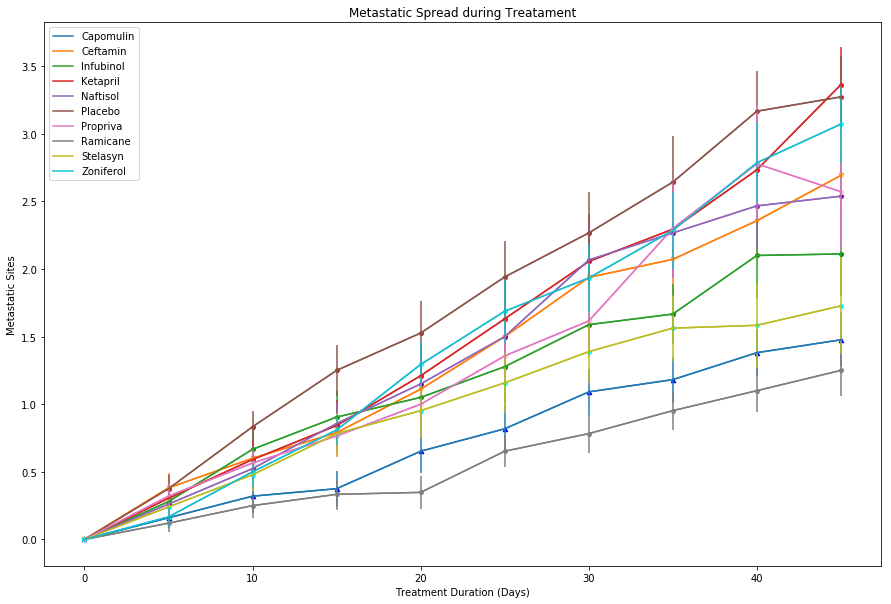

<Figure size 432x288 with 0 Axes>

In [26]:
# Generate the Plot (with Error Bars)
PlotSetup=PivotedMet.reset_index() # Resets DF to have default indexes.

#Sets up each drug scatter plot and adds it to the graph.
ax=PlotSetup.plot(title='Metastatic Spread during Treatament', kind='scatter',x='Timepoint',y='Capomulin',c='blue',marker='^',figsize=(15,10))
PlotSetup.plot(kind='scatter',x='Timepoint',y='Ceftamin',c='orange',marker='v', ax=ax)
PlotSetup.plot(kind='scatter',x='Timepoint',y='Infubinol',c='green',marker='p',ax=ax)
PlotSetup.plot(kind='scatter',x='Timepoint',y='Ketapril',c='red',marker='p',ax=ax)
PlotSetup.plot(kind='scatter',x='Timepoint',y='Naftisol',c='purple',marker='p',ax=ax)
PlotSetup.plot(kind='scatter',x='Timepoint',y='Placebo',c='brown',marker='p',ax=ax)
PlotSetup.plot(kind='scatter',x='Timepoint',y='Propriva',c='pink',marker='p',ax=ax)
PlotSetup.plot(kind='scatter',x='Timepoint',y='Ramicane',c='gray',marker='p',ax=ax)
PlotSetup.plot(kind='scatter',x='Timepoint',y='Stelasyn',c='cyan',marker='p',ax=ax)
PlotSetup.plot(kind='scatter',x='Timepoint',y='Zoniferol',c='aqua',marker='p',ax=ax)



PlotSetup.plot(kind='line',x='Timepoint',ax=ax)
ax.set_ylabel('Metastatic Sites') # Sets the y Axis label.
ax.set_xlabel('Treatment Duration (Days)') 
ax.legend(loc='best') #Moves the legend to the best location.

Index=PlotSetup.columns[1:] # Establishes the list of drugs.

#Uses a for loop to loop through each drug and add the standard error bars.
for Drug in Index:
    DF=MetseDF.loc[MetseDF['Drug']==Drug,['Timepoint','Metastatic Sites']]
    ax.errorbar(x=DF['Timepoint'],y=PlotSetup[Drug],yerr=DF['Metastatic Sites'])


 
    
# Save the Figure in the same folder.

fig=ax.get_figure();
fig.savefig('MetastaticSpread.png')


plt.show()
plt.tight_layout()

## Survival Rates

In [27]:
# Store the count of Mice Grouped by Drug and Timepoint 
MiceCount=GroupDrug_Tp['Mouse ID'].count()

# Convert to DataFrame
MiceCountDF=pd.DataFrame(MiceCount);
# Preview DataFrame
MiceCountDF=MiceCountDF.reset_index()
MiceCountDF=MiceCountDF.rename(columns={'Mouse ID':'Mouse Count'}) #Renames column 'Mouse ID' to 'Mouse Count'

MiceCountDF.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [28]:
# Minor Data Munging to Re-Format the Data Frames
PivotedMiceCount = pd.pivot_table(MiceCountDF,index='Timepoint',columns='Drug',values='Mouse Count') # Creates a Pivoted DF

# Preview that Reformatting worked
PivotedMiceCount.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


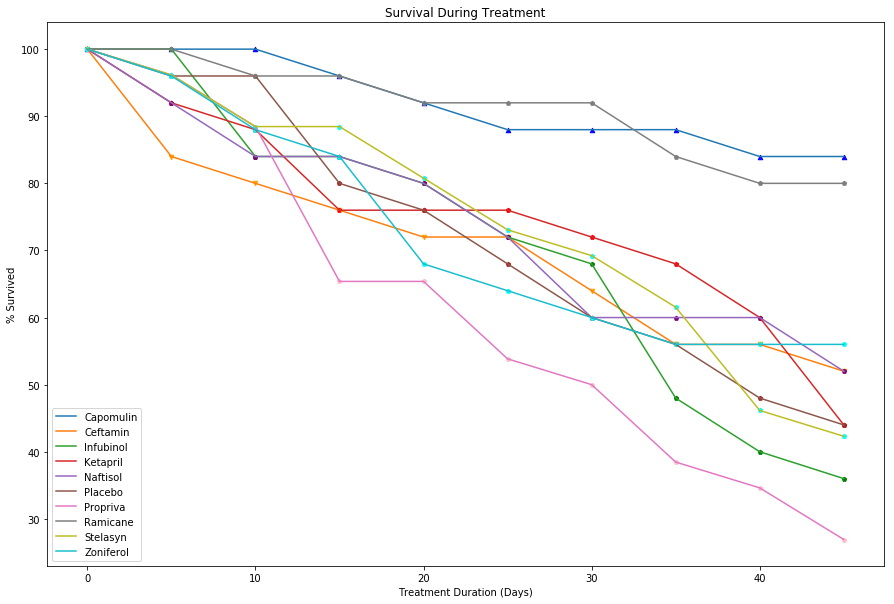

<Figure size 432x288 with 0 Axes>

In [29]:
# Generate the Percentage DF(Accounting for percentages)

StartDF=PivotedMiceCount.loc[0,:] # Sets up a series of the starting # of mice for each drug trial.

Drugs=PivotedMiceCount.columns #This gives us a list of the drugs used.

MouseSurvival=PivotedMiceCount
#This for loop goes through each cell in the dataframe and calculates the percent survival.
for index, row in PivotedMiceCount.iterrows():
    for Drug in Drugs:
        MouseSurvival.loc[index,Drug]=row[Drug]/StartDF[Drug]*100

# Creates the Plots

PlotSetup=MouseSurvival.reset_index() # Resets DF to have default indexes.

#Sets up each drug scatter plot and adds it to the graph.
ax=PlotSetup.plot(title='Survival During Treatment', kind='scatter',x='Timepoint',y='Capomulin',c='blue',marker='^',figsize=(15,10))
PlotSetup.plot(kind='scatter',x='Timepoint',y='Ceftamin',c='orange',marker='v', ax=ax)
PlotSetup.plot(kind='scatter',x='Timepoint',y='Infubinol',c='green',marker='p',ax=ax)
PlotSetup.plot(kind='scatter',x='Timepoint',y='Ketapril',c='red',marker='p',ax=ax)
PlotSetup.plot(kind='scatter',x='Timepoint',y='Naftisol',c='purple',marker='p',ax=ax)
PlotSetup.plot(kind='scatter',x='Timepoint',y='Placebo',c='brown',marker='p',ax=ax)
PlotSetup.plot(kind='scatter',x='Timepoint',y='Propriva',c='pink',marker='p',ax=ax)
PlotSetup.plot(kind='scatter',x='Timepoint',y='Ramicane',c='gray',marker='p',ax=ax)
PlotSetup.plot(kind='scatter',x='Timepoint',y='Stelasyn',c='cyan',marker='p',ax=ax)
PlotSetup.plot(kind='scatter',x='Timepoint',y='Zoniferol',c='aqua',marker='p',ax=ax)



PlotSetup.plot(kind='line',x='Timepoint',ax=ax)
ax.set_ylabel('% Survived') # Sets the y Axis label.
ax.set_xlabel('Treatment Duration (Days)') 
ax.legend(loc='best') #Moves the legend to the best location.

 
    
# Save the Figure in the same folder.

fig=ax.get_figure();
fig.savefig('PercentSurvived.png')

#Shows the figure
plt.show()
plt.tight_layout()



        

## Summary Bar Graph

In [30]:
# Calculate the percent changes for each drug

ListofDrugs=Index # Saves list of drugs from previous graphs.
Drugs={}
for Drug in ListofDrugs: # Loops through lists of Drugs 
    Diff=Pivoted.loc[45,Drug]-Pivoted.loc[0,Drug] # Calculates the diff between the last timepoint and first timepoint.
    PerChange=Diff/Pivoted.loc[0,Drug]*100 # Calculates the % difference.
    Drugs[Drug]=PerChange #Adds Drug % change to a dict.


# Display the data to confirm
Drugs

{'Capomulin': -19.475302667894173,
 'Ceftamin': 42.51649185589744,
 'Infubinol': 46.12347172785187,
 'Ketapril': 57.028794686606076,
 'Naftisol': 53.92334713476923,
 'Placebo': 51.29796048315153,
 'Propriva': 47.24117486320637,
 'Ramicane': -22.320900462766673,
 'Stelasyn': 52.085134287899024,
 'Zoniferol': 46.57975086509525}

(('Capomulin', -19.475302667894173), ('Ceftamin', 42.51649185589744), ('Infubinol', 46.12347172785187), ('Ketapril', 57.028794686606076), ('Naftisol', 53.92334713476923), ('Placebo', 51.29796048315153), ('Propriva', 47.24117486320637), ('Ramicane', -22.320900462766673), ('Stelasyn', 52.085134287899024), ('Zoniferol', 46.57975086509525))


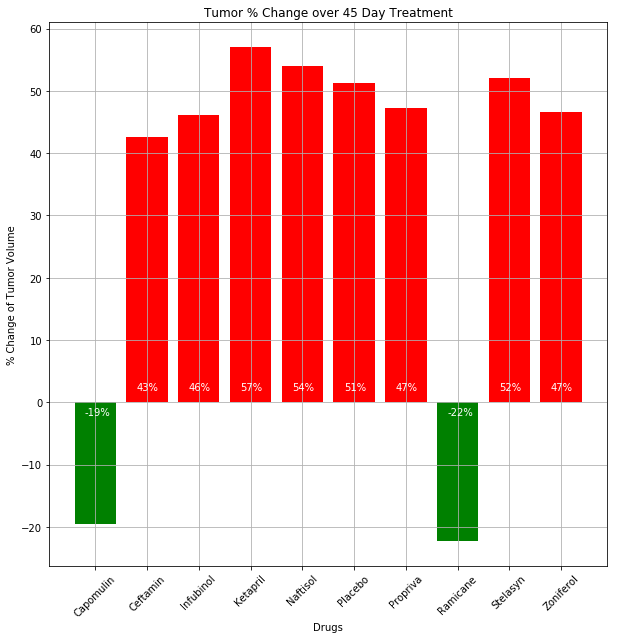

<Figure size 432x288 with 0 Axes>

In [31]:
# Store all Relevant Percent Changes into a Tuple

DrugTuple =tuple(Drugs.items())
print(DrugTuple)

# Splice the data between passing and failing drugs
ListPassDrugs=[]
ListFailDrugs=[]
for i in range(len(DrugTuple)): #Loops through the Tuple and separates failing drugs and passing drugs.
    if(DrugTuple[i][1]<0):
        ListPassDrugs.append(DrugTuple[i][0]) #Adds to the passing drugs.
    else:
        ListFailDrugs.append(DrugTuple[i][0]) #Adds to the failing drugs.
    
        
        
#Orient widths. Add labels, tick marks, etc. 


plt.figure(figsize=(10,10))
x_axis=np.arange(len(DrugTuple)) # Creates a list from number of drugs.
tick_locations=[value+.4 for value in x_axis] #Sets the correspond tick locations.
plt.xticks(tick_locations,Drugs.keys(),rotation='45') # Adds the bar graph ticks to the corresponding locations.
plt.ylabel('% Change of Tumor Volume')
plt.xlabel('Drugs')
plt.title('Tumor % Change over 45 Day Treatment')
plt.grid()
i=0.4; # This iterator sets the locations for the middle of bar graph.


for Drug,Change in DrugTuple: # Loops through the Tuple and parses for the Drug/%Change. 

        if Drug in ListPassDrugs: #Checks if the Drug is a passing drug.
            color='g' #Sets bar graph color to green.
            TextStart= -2 #Sets the starting location for the text.
    
        else: # Else represents the failing drug.
            color='r' #Sets the color of bar graph to red.
            TextStart= 2 # Sets starting location for text.
        
        plt.bar(i,height=Change,color=color) #Plots the bar onto the graph.
        plt.text(i-.2,y=TextStart,s=f"{Change:.0f}%",color = 'w') #Adds the Text label for the % change for each bar graph.
        i=i+1 #Iterates to the next spot to place the bar.
        


        
# Save the Figure
plt.savefig('PercentChange.png')

# Show the Figure
plt.show()
plt.tight_layout()